<a href="https://colab.research.google.com/github/bryanZc/Quora-Similar-Question-Detection/blob/master/QuoraProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLY 580 Final Project
## Quora Similar Question Pair Detection
## Cheng Zhong

### Data Preperation

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv("drive/My Drive/ANLY 580/train.csv")

In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



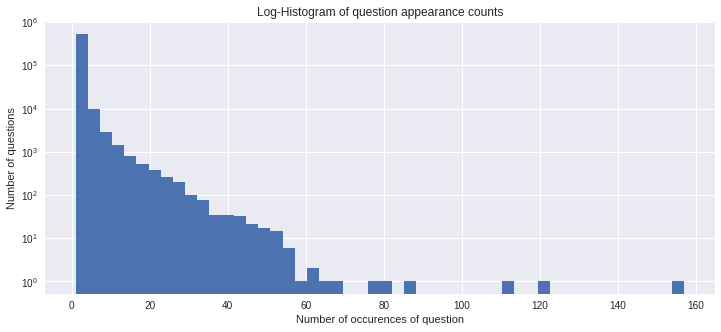

In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [6]:
df_test = pd.read_csv('drive/My Drive/ANLY 580/test.csv')
df_test.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [0]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

In [0]:
import os
import re
import csv
import codecs
from string import punctuation
from nltk.corpus import stopwords

def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0k ", "0000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
                  
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)



In [12]:
texts_1 = [] 
texts_2 = []
labels = []
with codecs.open("drive/My Drive/ANLY 580/train.csv", encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    header = next(reader)
    for values in reader:
        texts_1.append(text_to_wordlist(values[3]))
        texts_2.append(text_to_wordlist(values[4]))
        labels.append(int(values[5]))
print('Found %s texts in train.csv' % len(texts_1))

Found 404290 texts in train.csv


In [14]:
test_texts_1 = [] 
test_texts_2 = []
test_ids = []
with codecs.open("drive/My Drive/ANLY 580/test.csv", encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    header = next(reader)
    for values in reader:
      if len(values) >= 3:
        test_texts_1.append(text_to_wordlist(values[1]))
        test_texts_2.append(text_to_wordlist(values[2]))
        test_ids.append(values[0])

print('Found %s texts in test.csv' % len(test_texts_1))

Found 3563474 texts in test.csv


In [15]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(texts_1 + texts_2 + test_texts_1 + test_texts_2)

sequences_1 = tokenizer.texts_to_sequences(texts_1)
sequences_2 = tokenizer.texts_to_sequences(texts_2)
test_sequences_1 = tokenizer.texts_to_sequences(test_texts_1)
test_sequences_2 = tokenizer.texts_to_sequences(test_texts_2)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Using TensorFlow backend.


Found 120325 unique tokens


In [16]:
from keras.preprocessing.sequence import pad_sequences

data_1 = pad_sequences(sequences_1, maxlen=30)
data_2 = pad_sequences(sequences_2, maxlen=30)
labels = np.array(labels)
print('Shape of data tensor:', data_1.shape)
print('Shape of label tensor:', labels.shape)

test_data_1 = pad_sequences(test_sequences_1, maxlen=30)
test_data_2 = pad_sequences(test_sequences_2, maxlen=30)
test_ids = np.array(test_ids)

Shape of data tensor: (404290, 30)
Shape of label tensor: (404290,)


### Basic CNN Model

In [44]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Conv2D, Embedding, Dot
from keras.layers.merge import Concatenate
from keras import backend as K

input1 = Input((data_1.shape[1],))
input2 = Input((data_2.shape[1],))
Embedding_matrix = Embedding(len(word_index)+1, 300, input_length=data_1.shape[1], name="embedding")
z1 = Embedding_matrix(input1)
z2 = Embedding_matrix(input2)
    
Conv = Conv1D(filters=200,
                    kernel_size=3,
                    padding="valid",
                    activation="relu",
                    strides=1)
conv1 = Conv(z1)
conv2 = Conv(z2)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = MaxPooling1D(pool_size=2)(conv2)
conv1 = Flatten()(conv1)
conv2 = Flatten()(conv2)
similar_score = Dense(2800, activation=None)(conv1)
similar_score = Dot(1)([similar_score, conv2])
z = Concatenate()([conv1, similar_score, conv2])
z = Dropout(0.8)(z)
z = Dense(300, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)
model = Model([input1, input2], model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 300)      36097800    input_34[0][0]                   
                                                                 input_35[0][0]                   
__________________________________________________________________________________________________
input_35 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
conv1d_70 (Conv1D)              (None, 28, 200)      180200      embedding[0][0]                  
          

### Model Training

In [45]:
model_training = model.fit([data_1, data_2], labels, batch_size=128, epochs=3)

Epoch 1/3
404290/404290 [==============================] - 231s 570us/step - loss: 0.4990 - acc: 0.7554
Epoch 2/3
404290/404290 [==============================] - 228s 564us/step - loss: 0.4225 - acc: 0.8008
Epoch 3/3
404290/404290 [==============================] - 228s 565us/step - loss: 0.3761 - acc: 0.8258


In [0]:
predict_label = model.predict([test_data_1, test_data_2])

In [47]:
submission_df = {"test_id": test_ids, "is_duplicate": predict_label[:,0]}
submission = pd.DataFrame(submission_df)
print(len(submission))
submission = submission.drop_duplicates()
print(len(submission))
submission.to_csv("submission.csv", index=False)

3563474
2345796


In [0]:

print(len(submission))
print(len(df_test))
submission = submission.drop_duplicates()
print(len(submission))

3563474
3563475
2345796


### Random Forest Tree


In [21]:
import nltk
nltk.download('stopwords')
from string import punctuation
import re
from nltk.stem import SnowballStemmer
from subprocess import check_output

train=pd.read_csv("drive/My Drive/ANLY 580/train.csv")
test=pd.read_csv("drive/My Drive/ANLY 580/test.csv")


def convert_lower(data):
    data.question1=data.question1.str.lower()
    data.question2=data.question2.str.lower()
    data.question1=data.question1.astype(str)
    data.question2=data.question2.astype(str)
    return data
train=convert_lower(train)
test=convert_lower(test)

def process_questions(data,remove_stop_words=True,stem_words=False):
    question1=[]
    question2=[]
    for question in data.question1:
        question1.append(text_to_wordlist(question,remove_stop_words,stem_words))
    for question in data.question2:
        question2.append(text_to_wordlist(question,remove_stop_words,stem_words))
    data.question1=question1
    data.question2=question2
    return data

train=process_questions(train,stem_words=False)
test=process_questions(test)

def normalized_word_share(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))    
    return 1.0 * len(w1&w2)/(len(w1)+len(w2))
def addnewattribute(data):
    data['q1len']=data['question1'].str.len()
    data['q2len']=data['question2'].str.len()
    data['word_share']=data.apply(normalized_word_share,axis=1)
    return data

train=addnewattribute(train)
test=addnewattribute(test)

X_attr=['q1len','q2len','word_share']
Y_attr=['is_duplicate']

X_train=train[X_attr]
X_test=test[X_attr]
Y_train=train[Y_attr]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
       min_samples_split=2, min_samples_leaf=100, min_weight_fraction_leaf=0.0, 
       max_features='sqrt', max_leaf_nodes=None, bootstrap=True, oob_score=True, 
       n_jobs=1, random_state=1, verbose=0, warm_start=False, class_weight=None)

clf.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [23]:
p=clf.predict_proba(X_test)
submission=pd.DataFrame()
submission['test_id']=test['test_id']
submission['is_duplicate']=p[:,1]

print(len(submission))
len(submission['test_id'])
test_id = submission['test_id']
len(test_id.drop_duplicates())
submission_rf = submission[:2345796]
print(len(submission_rf))
submission_rf.to_csv("submission_rf.csv", index=False)

3563475
2345796


### MLP NN

In [24]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf.fit(X_train,Y_train.values.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
p=clf.predict_proba(X_test)
submission=pd.DataFrame()
submission['test_id']=test['test_id']
submission['is_duplicate']=p[:,1]

print(len(submission))
len(submission['test_id'])
test_id = submission['test_id']
len(test_id.drop_duplicates())
submission_mlp = submission[:2345796]
print(len(submission_mlp))
submission_mlp.to_csv("submission_mlp.csv", index=False)

3563475
2345796
